<a href="https://colab.research.google.com/github/ssubbinn/ESAA/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [ ]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9121265377855887

* 정밀도

In [ ]:
from sklearn.metrics import precision_score
precision_score(y,y_pred)

0.900990099009901

* 재현율

In [ ]:
from sklearn.metrics import recall_score
recall_score(y,y_pred)

0.8584905660377359

* F1 score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [ ]:
from sklearn.preprocessing import Binarizer
pred_proba=model_lor.predict_proba(X) #LogisticRegression객체에서 predict_proba()메서드 수행
pred_proba1=pred_proba[:,1].reshape(-1,1) #반환값의 두번째 칼럼, positive칼럼 하나만 추출해 binarizer 적용
binarizer=Binarizer(threshold=0.1) #threshold 값보다 같거나 작으면0, 크면 1 반환
y_pred2=binarizer.transform(pred_proba1)

In [ ]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print(confusion_matrix(y,y_pred2)) 
print(accuracy_score(y, y_pred2))
print(precision_score(y,y_pred2))
print(recall_score(y,y_pred2))
print(f1_score(y, y_pred2)) 


[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


* ROC 곡선 시각화

In [ ]:
from sklearn.metrics import roc_curve 
probas = model_lor.predict_proba(X) 
fpr, tpr, thresholds = roc_curve(y, probas[:,1])

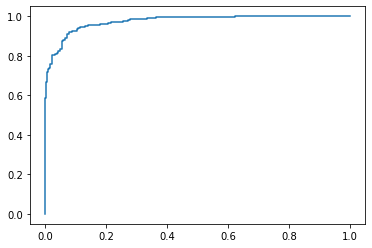

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(fpr, tpr, label="ROC")

* ROC AUC 값

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y, probas[:,1]))

0.9741557000158554
